In [1]:
import numpy as np
import pandas as pd

# visualization Library/tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# machine learning algorith
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



from scipy.stats import randint as sp_randint

In [2]:
#import the dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.shape

(400000, 19)

In [3]:
train.head(5)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,dcf68cc2fb515ccad7d8b9b3bd80ee2a4b270063,SAINT-LOUIS,K > 24 month,17000.0,32.0,18000.0,6000.0,34.0,NaN,97.0,355.0,6.0,NaN,NaN,NO,62,All-net 500F=2000F;5d,35.0,0
1,71c44b5ba328db5c4192a80f7cf8f244d9350ed0,NaN,K > 24 month,4300.0,29.0,4427.0,1476.0,37.0,1764.0,8.0,3.0,0.0,NaN,2.0,NO,40,"Data: 100 F=40MB,24H",22.0,0
2,ce46411b1526c94f20a383b8cb188f8d27f82a0a,TAMBACOUNDA,K > 24 month,1500.0,3.0,1500.0,500.0,3.0,NaN,30.0,30.0,NaN,NaN,NaN,NO,32,All-net 500F=2000F;5d,3.0,0
3,f467cdb6669818373c26c2bad44e01ba66f97d21,FATICK,K > 24 month,1500.0,3.0,2497.0,832.0,4.0,0.0,159.0,45.0,19.0,NaN,NaN,NO,18,On net 200F=Unlimited _call24H,3.0,0
4,ec45e1a1888a32b5dcce0954cfec20c6e037db31,FATICK,K > 24 month,NaN,NaN,498.0,166.0,3.0,1.0,1.0,3.0,NaN,NaN,NaN,NO,50,NaN,NaN,0


In [4]:
test.head(5)

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,af900d87e73b7ff6509d2203df4704a98aa5f2a6,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN
1,5335efd940280b82143272275637d1e65d37eadb,NaN,K > 24 month,NaN,NaN,10.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN
2,a581f4fa08677c26f83f643248c667e241043086,NaN,K > 24 month,1900.0,15.0,2299.0,766.0,21.0,414.0,NaN,7.0,2.0,NaN,NaN,NO,27,"Data: 100 F=40MB,24H",17.0
3,64f67177d0775262b8087a9e2e3b8061b6324ae6,DAKAR,K > 24 month,3000.0,9.0,2603.0,868.0,14.0,332.0,0.0,23.0,4.0,NaN,NaN,NO,46,IVR Echat_Daily_50F,3.0
4,0d6009a4594c4be22449b8d9cc01a0bcea98faea,DAKAR,K > 24 month,32000.0,47.0,33000.0,11000.0,47.0,NaN,128.0,555.0,280.0,NaN,NaN,NO,61,All-net 500F=2000F;5d,65.0


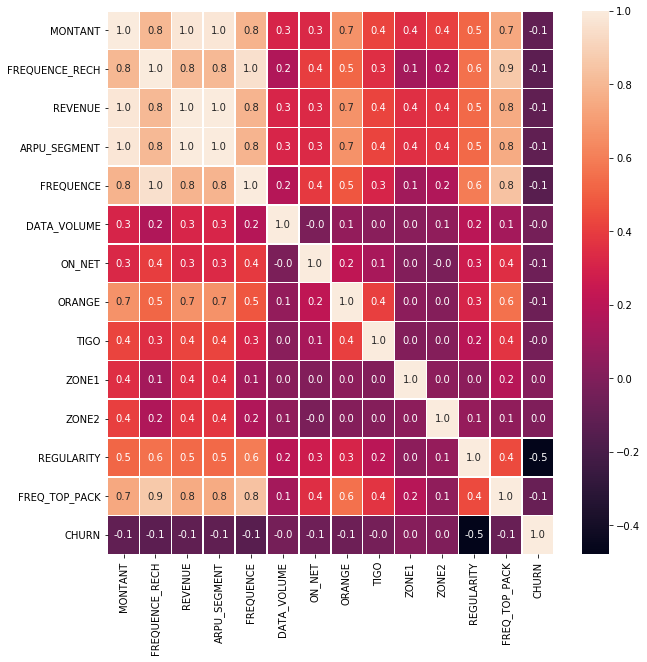

In [5]:
train.corr
#correlation map
import seaborn as sns
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

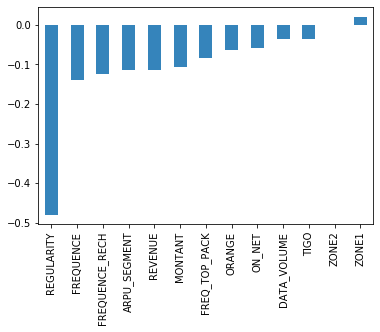

In [6]:
tst = train.corr()['CHURN'].copy()
tst = tst.drop('CHURN')
tst.sort_values(inplace=True)
tst.plot(kind='bar', alpha = 0.9)

In [7]:
train.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,259723.000000,259723.000000,265337.000000,265337.000000,265337.000000,203146.000000,254181.000000,233683.000000,160614.000000,31690.000000,25513.000000,400000.000000,232671.000000,400000.00000
mean,5522.971346,11.503733,5505.487757,1835.167658,13.951835,3369.763441,275.917586,95.532927,23.134608,7.874282,7.187003,28.046502,9.254209,0.18711
std,7099.640630,13.275514,7175.802367,2391.929290,14.679943,12281.867504,873.593034,204.733272,63.061871,35.642843,26.964028,22.282773,12.305563,0.39000
min,20.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.00000
25%,1000.000000,2.000000,1000.000000,333.000000,3.000000,0.000000,5.000000,7.000000,2.000000,0.000000,0.000000,6.000000,2.000000,0.00000
50%,3000.000000,6.000000,3000.000000,1000.000000,9.000000,267.000000,27.000000,29.000000,6.000000,1.000000,2.000000,24.000000,5.000000,0.00000
75%,7300.000000,15.000000,7340.000000,2447.000000,19.000000,2925.000000,155.000000,99.000000,20.000000,3.000000,5.000000,51.000000,12.000000,0.00000
max,226550.000000,133.000000,233413.000000,77804.000000,91.000000,934576.000000,45011.000000,6788.000000,2758.000000,1657.000000,1011.000000,62.000000,629.000000,1.00000


In [8]:
#Making a copy of the training and test data
df_test= test.copy() 
df_train= train.copy()

In [9]:
df_train.set_index('user_id', inplace = True)
df_test.set_index('user_id',inplace=True)

In [10]:
df_train.isna().sum()

REGION            157520
TENURE                 0
MONTANT           140277
FREQUENCE_RECH    140277
REVENUE           134663
ARPU_SEGMENT      134663
FREQUENCE         134663
DATA_VOLUME       196854
ON_NET            145819
ORANGE            166317
TIGO              239386
ZONE1             368310
ZONE2             374487
MRG                    0
REGULARITY             0
TOP_PACK          167329
FREQ_TOP_PACK     167329
CHURN                  0
dtype: int64

In [11]:
#check percentage of null values
((df_train.isna().sum()*100)/len(df_train)).sort_values(ascending=False)


ZONE2             93.62175
ZONE1             92.07750
TIGO              59.84650
DATA_VOLUME       49.21350
TOP_PACK          41.83225
FREQ_TOP_PACK     41.83225
ORANGE            41.57925
REGION            39.38000
ON_NET            36.45475
FREQUENCE_RECH    35.06925
MONTANT           35.06925
FREQUENCE         33.66575
ARPU_SEGMENT      33.66575
REVENUE           33.66575
MRG                0.00000
REGULARITY         0.00000
TENURE             0.00000
CHURN              0.00000
dtype: float64

In [12]:
#no of unique values
df_train.nunique()

REGION               14
TENURE                8
MONTANT            2421
FREQUENCE_RECH      111
REVENUE           23760
ARPU_SEGMENT      11014
FREQUENCE            91
DATA_VOLUME       22229
ON_NET             5996
ORANGE             2072
TIGO                805
ZONE1               319
ZONE2               255
MRG                   1
REGULARITY           62
TOP_PACK            111
FREQ_TOP_PACK       170
CHURN                 2
dtype: int64

In [13]:
#drop MRG because it contains a single Unique value
#drop ZONE1 and ZONE2 because it contains too much missing values
df_train.drop(['ZONE1','ZONE2','MRG'], axis =1, inplace = True)
df_test.drop(['ZONE1','ZONE2','MRG'], axis =1, inplace = True)

In [14]:
### Missing Value Treatmen

In [15]:
df_test['CHURN'] = 'test' # for easy seperation

#Combine train and test  to avoid repetition
data = pd.concat([df_train, df_test]).reset_index(drop=True)

In [16]:
data.shape ,df_train.shape, df_test.shape

((500000, 15), (400000, 15), (100000, 15))

In [17]:
missing_col = data.columns[data.isna().any()]
missing_col

Index(['REGION', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'ARPU_SEGMENT',
       'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'TOP_PACK',
       'FREQ_TOP_PACK'],
      dtype='object')

In [18]:
data['REGION'].head()

0    SAINT-LOUIS
1            NaN
2    TAMBACOUNDA
3         FATICK
4         FATICK
Name: REGION, dtype: object

In [19]:
# filling NaN values in numeric features
for col in missing_col.drop(['REGION', 'TOP_PACK']):
    
    data[col].fillna(data[col].median(), inplace = True)
data['REGION'].head(10)

0    SAINT-LOUIS
1            NaN
2    TAMBACOUNDA
3         FATICK
4         FATICK
5          THIES
6            NaN
7    SAINT-LOUIS
8    TAMBACOUNDA
9            NaN
Name: REGION, dtype: object

In [20]:
# filling NaN values in numeric features
for col in [ 'TOP_PACK', 'REGION']:
    
    data[col].fillna(col+'_NAN',inplace = True)
data['REGION'].head(10)

0    SAINT-LOUIS
1     REGION_NAN
2    TAMBACOUNDA
3         FATICK
4         FATICK
5          THIES
6     REGION_NAN
7    SAINT-LOUIS
8    TAMBACOUNDA
9     REGION_NAN
Name: REGION, dtype: object

In [21]:
data.isna().sum()

REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [22]:
#Encoding Categorical features
cat_features = data.select_dtypes(exclude=np.number).columns.drop('CHURN','user_id')
cat_features

Index(['REGION', 'TENURE', 'TOP_PACK'], dtype='object')

In [23]:
for col in cat_features:
    print('{} has {} unique categories'.format(col, data[col].nunique()))

REGION has 15 unique categories
TENURE has 8 unique categories
TOP_PACK has 113 unique categories


In [24]:

data = pd.get_dummies(columns= ['REGION', 'TENURE'], data = data)

In [25]:
#Label encoding
data['TOP_PACK']  = pd.factorize(data['TOP_PACK'])[0]

## Seperating train and test

In [26]:
train_df = data.loc[( data['CHURN'] != 'test')].reset_index(drop = True)
test_df = data.loc[( data['CHURN'] == 'test')].reset_index(drop = True)

In [27]:
train_df.shape, test.shape

((400000, 36), (100000, 18))

In [28]:
X = train_df.drop('CHURN', axis = 1)
y = train_df['CHURN'].apply(int)
y

0         0
1         0
2         0
3         0
4         0
         ..
399995    0
399996    0
399997    0
399998    1
399999    0
Name: CHURN, Length: 400000, dtype: int64

In [29]:
# Modelling

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier



In [31]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

#Observing the dimension
X_train.shape, y_train.shape, X_test.shape, y_test.shape



((320000, 35), (320000,), (80000, 35), (80000,))

In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
gbm = GradientBoostingClassifier()

xgb = XGBClassifier()

In [34]:

gbm.fit(X_train, y_train)

xgb.fit( X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
print('GradientBoostingClassifier Log loss: {}'.format(log_loss(y_test, gbm.predict_proba(X_test)[:,1])))
print('XGB Log loss: {}'.format(log_loss(y_test, xgb.predict_proba(X_test)[:,1])))

GradientBoostingClassifier Log loss: 0.25672498198698424
XGB Log loss: 0.25688313345521163


In [44]:
lgb = LGBMClassifier()
cb = CatBoostClassifier()

cb.fit( X_train, y_train)

lgb.fit(X_train, y_train)

Learning rate set to 0.120958
0:	learn: 0.5180920	total: 427ms	remaining: 7m 6s
1:	learn: 0.4191260	total: 870ms	remaining: 7m 14s
2:	learn: 0.3608755	total: 1.25s	remaining: 6m 54s
3:	learn: 0.3239650	total: 1.69s	remaining: 7m
4:	learn: 0.3026622	total: 2.07s	remaining: 6m 51s
5:	learn: 0.2889476	total: 2.46s	remaining: 6m 47s
6:	learn: 0.2788611	total: 2.87s	remaining: 6m 46s
7:	learn: 0.2726292	total: 3.23s	remaining: 6m 40s
8:	learn: 0.2679615	total: 3.66s	remaining: 6m 42s
9:	learn: 0.2646741	total: 3.98s	remaining: 6m 34s
10:	learn: 0.2621939	total: 4.39s	remaining: 6m 34s
11:	learn: 0.2601903	total: 4.8s	remaining: 6m 35s
12:	learn: 0.2588353	total: 5.2s	remaining: 6m 35s
13:	learn: 0.2577830	total: 5.54s	remaining: 6m 30s
14:	learn: 0.2567917	total: 5.96s	remaining: 6m 31s
15:	learn: 0.2560283	total: 6.41s	remaining: 6m 34s
16:	learn: 0.2555145	total: 6.8s	remaining: 6m 33s
17:	learn: 0.2551974	total: 7.43s	remaining: 6m 45s
18:	learn: 0.2548106	total: 7.77s	remaining: 6m 40s


157:	learn: 0.2492275	total: 1m 9s	remaining: 6m 10s
158:	learn: 0.2492048	total: 1m 9s	remaining: 6m 9s
159:	learn: 0.2491843	total: 1m 10s	remaining: 6m 8s
160:	learn: 0.2491684	total: 1m 10s	remaining: 6m 8s
161:	learn: 0.2491501	total: 1m 11s	remaining: 6m 8s
162:	learn: 0.2491309	total: 1m 11s	remaining: 6m 7s
163:	learn: 0.2491232	total: 1m 11s	remaining: 6m 6s
164:	learn: 0.2491011	total: 1m 12s	remaining: 6m 6s
165:	learn: 0.2490717	total: 1m 12s	remaining: 6m 6s
166:	learn: 0.2490579	total: 1m 13s	remaining: 6m 5s
167:	learn: 0.2490325	total: 1m 13s	remaining: 6m 4s
168:	learn: 0.2490071	total: 1m 14s	remaining: 6m 4s
169:	learn: 0.2489878	total: 1m 14s	remaining: 6m 3s
170:	learn: 0.2489620	total: 1m 14s	remaining: 6m 2s
171:	learn: 0.2489536	total: 1m 15s	remaining: 6m 1s
172:	learn: 0.2489310	total: 1m 15s	remaining: 6m 1s
173:	learn: 0.2489115	total: 1m 15s	remaining: 6m
174:	learn: 0.2488844	total: 1m 16s	remaining: 5m 59s
175:	learn: 0.2488754	total: 1m 16s	remaining: 5m

311:	learn: 0.2466051	total: 2m 13s	remaining: 4m 54s
312:	learn: 0.2465885	total: 2m 13s	remaining: 4m 53s
313:	learn: 0.2465716	total: 2m 14s	remaining: 4m 53s
314:	learn: 0.2465579	total: 2m 14s	remaining: 4m 52s
315:	learn: 0.2465410	total: 2m 14s	remaining: 4m 51s
316:	learn: 0.2465243	total: 2m 15s	remaining: 4m 51s
317:	learn: 0.2465083	total: 2m 15s	remaining: 4m 51s
318:	learn: 0.2464882	total: 2m 16s	remaining: 4m 50s
319:	learn: 0.2464702	total: 2m 16s	remaining: 4m 50s
320:	learn: 0.2464612	total: 2m 16s	remaining: 4m 49s
321:	learn: 0.2464455	total: 2m 17s	remaining: 4m 48s
322:	learn: 0.2464415	total: 2m 17s	remaining: 4m 48s
323:	learn: 0.2464363	total: 2m 17s	remaining: 4m 47s
324:	learn: 0.2464315	total: 2m 18s	remaining: 4m 47s
325:	learn: 0.2464193	total: 2m 18s	remaining: 4m 46s
326:	learn: 0.2464052	total: 2m 18s	remaining: 4m 45s
327:	learn: 0.2463953	total: 2m 19s	remaining: 4m 45s
328:	learn: 0.2463765	total: 2m 19s	remaining: 4m 44s
329:	learn: 0.2463580	total:

464:	learn: 0.2444707	total: 3m 17s	remaining: 3m 47s
465:	learn: 0.2444603	total: 3m 18s	remaining: 3m 47s
466:	learn: 0.2444406	total: 3m 18s	remaining: 3m 46s
467:	learn: 0.2444256	total: 3m 18s	remaining: 3m 46s
468:	learn: 0.2444020	total: 3m 19s	remaining: 3m 45s
469:	learn: 0.2443879	total: 3m 19s	remaining: 3m 45s
470:	learn: 0.2443730	total: 3m 20s	remaining: 3m 44s
471:	learn: 0.2443588	total: 3m 20s	remaining: 3m 44s
472:	learn: 0.2443447	total: 3m 21s	remaining: 3m 44s
473:	learn: 0.2443254	total: 3m 21s	remaining: 3m 43s
474:	learn: 0.2443109	total: 3m 21s	remaining: 3m 43s
475:	learn: 0.2442951	total: 3m 22s	remaining: 3m 42s
476:	learn: 0.2442794	total: 3m 22s	remaining: 3m 41s
477:	learn: 0.2442654	total: 3m 22s	remaining: 3m 41s
478:	learn: 0.2442542	total: 3m 23s	remaining: 3m 41s
479:	learn: 0.2442323	total: 3m 23s	remaining: 3m 40s
480:	learn: 0.2442255	total: 3m 23s	remaining: 3m 40s
481:	learn: 0.2442150	total: 3m 24s	remaining: 3m 39s
482:	learn: 0.2442016	total:

617:	learn: 0.2424350	total: 4m 16s	remaining: 2m 38s
618:	learn: 0.2424331	total: 4m 16s	remaining: 2m 37s
619:	learn: 0.2424170	total: 4m 16s	remaining: 2m 37s
620:	learn: 0.2424048	total: 4m 17s	remaining: 2m 36s
621:	learn: 0.2423924	total: 4m 17s	remaining: 2m 36s
622:	learn: 0.2423800	total: 4m 17s	remaining: 2m 36s
623:	learn: 0.2423695	total: 4m 18s	remaining: 2m 35s
624:	learn: 0.2423579	total: 4m 18s	remaining: 2m 35s
625:	learn: 0.2423457	total: 4m 18s	remaining: 2m 34s
626:	learn: 0.2423289	total: 4m 19s	remaining: 2m 34s
627:	learn: 0.2423185	total: 4m 19s	remaining: 2m 33s
628:	learn: 0.2423077	total: 4m 19s	remaining: 2m 33s
629:	learn: 0.2422967	total: 4m 20s	remaining: 2m 32s
630:	learn: 0.2422802	total: 4m 20s	remaining: 2m 32s
631:	learn: 0.2422701	total: 4m 20s	remaining: 2m 31s
632:	learn: 0.2422646	total: 4m 21s	remaining: 2m 31s
633:	learn: 0.2422496	total: 4m 21s	remaining: 2m 30s
634:	learn: 0.2422352	total: 4m 21s	remaining: 2m 30s
635:	learn: 0.2422241	total:

770:	learn: 0.2406182	total: 5m 7s	remaining: 1m 31s
771:	learn: 0.2406070	total: 5m 8s	remaining: 1m 31s
772:	learn: 0.2405930	total: 5m 8s	remaining: 1m 30s
773:	learn: 0.2405755	total: 5m 8s	remaining: 1m 30s
774:	learn: 0.2405595	total: 5m 9s	remaining: 1m 29s
775:	learn: 0.2405433	total: 5m 9s	remaining: 1m 29s
776:	learn: 0.2405296	total: 5m 9s	remaining: 1m 28s
777:	learn: 0.2405164	total: 5m 10s	remaining: 1m 28s
778:	learn: 0.2405027	total: 5m 10s	remaining: 1m 28s
779:	learn: 0.2404887	total: 5m 10s	remaining: 1m 27s
780:	learn: 0.2404759	total: 5m 11s	remaining: 1m 27s
781:	learn: 0.2404618	total: 5m 11s	remaining: 1m 26s
782:	learn: 0.2404423	total: 5m 11s	remaining: 1m 26s
783:	learn: 0.2404373	total: 5m 12s	remaining: 1m 26s
784:	learn: 0.2404250	total: 5m 12s	remaining: 1m 25s
785:	learn: 0.2404160	total: 5m 12s	remaining: 1m 25s
786:	learn: 0.2404049	total: 5m 13s	remaining: 1m 24s
787:	learn: 0.2403961	total: 5m 13s	remaining: 1m 24s
788:	learn: 0.2403884	total: 5m 13s

925:	learn: 0.2388766	total: 6m	remaining: 28.8s
926:	learn: 0.2388655	total: 6m	remaining: 28.4s
927:	learn: 0.2388506	total: 6m 1s	remaining: 28s
928:	learn: 0.2388425	total: 6m 1s	remaining: 27.6s
929:	learn: 0.2388326	total: 6m 1s	remaining: 27.2s
930:	learn: 0.2388170	total: 6m 2s	remaining: 26.8s
931:	learn: 0.2388091	total: 6m 2s	remaining: 26.4s
932:	learn: 0.2387990	total: 6m 2s	remaining: 26.1s
933:	learn: 0.2387903	total: 6m 3s	remaining: 25.7s
934:	learn: 0.2387841	total: 6m 3s	remaining: 25.3s
935:	learn: 0.2387796	total: 6m 3s	remaining: 24.9s
936:	learn: 0.2387651	total: 6m 4s	remaining: 24.5s
937:	learn: 0.2387639	total: 6m 4s	remaining: 24.1s
938:	learn: 0.2387574	total: 6m 4s	remaining: 23.7s
939:	learn: 0.2387483	total: 6m 5s	remaining: 23.3s
940:	learn: 0.2387400	total: 6m 5s	remaining: 22.9s
941:	learn: 0.2387290	total: 6m 5s	remaining: 22.5s
942:	learn: 0.2387201	total: 6m 6s	remaining: 22.1s
943:	learn: 0.2387023	total: 6m 6s	remaining: 21.7s
944:	learn: 0.238692

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [37]:
print('LightGradientBoostingClassifier Log loss: {}'.format(log_loss(y_test, lgb.predict_proba(X_test)[:,1])))
print('CB Log loss: {}'.format(log_loss(y_test, cb.predict_proba(X_test)[:,1])))

LightGradientBoostingClassifier Log loss: 0.25578916462020107
CB Log loss: 0.2568400061200885


In [43]:


test_pred = lgb.predict(test_df.drop('CHURN', axis = 1) )    #predict on the test set for submission
df = {'user_id': test['user_id'], 'CHURN': test_pred}
sub = pd.DataFrame(data = df)
sub = sub[['user_id', 'CHURN']]
sub.to_csv('sampleSubmissionlgb.csv', index = False)

In [48]:
test_pred = cb.predict(test_df.drop('CHURN', axis = 1) )    #predict on the test set for submission
df = {'user_id': test['user_id'], 'CHURN': test_pred}
sub = pd.DataFrame(data = df)
sub = sub[['user_id', 'CHURN']]
sub.to_csv('sampleSubmissioncb.csv', index = False)

In [ ]:
sub['CHURN'] = prediction
sub.to_csv('submissionxgb.csv', index =False)